In [2]:
import pandas as pd
import numpy as np

In [28]:
df=pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
#Lot Area (in sq ft)
#Overall Quality (scale from 1 to 10)
#Overall Condition (scale from 1 to 10)
#Total Basement Area (in sq ft)
#Number of Full Bathrooms
#Number of Half Bathrooms
#Number of Bedrooms above ground
#Total Number of Rooms above ground
#Number of Fireplaces
#Garage Area (in sq ft)

In [29]:
# Checking for nullvalues
#I can see no null values here .
df.isnull().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee91b935e0>,
      dtype=object)

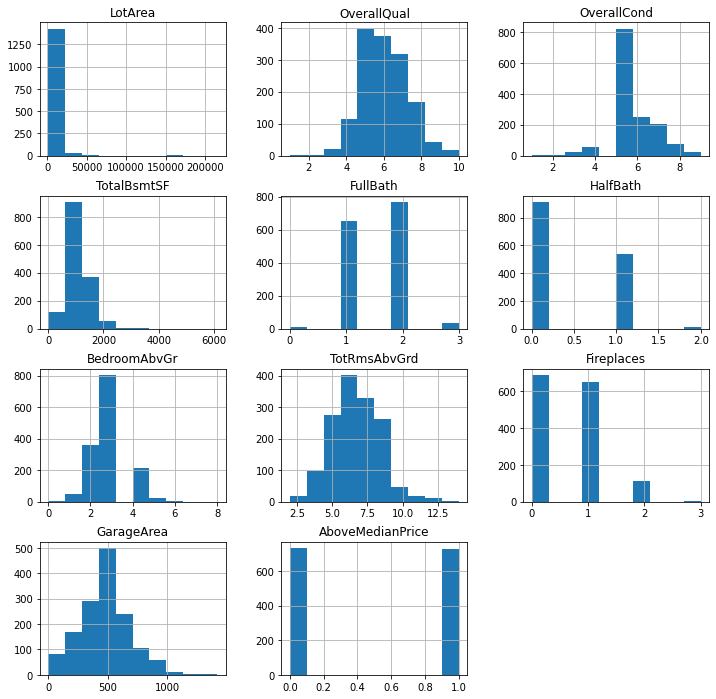

In [31]:
df.hist(figsize=(12,12))

In [32]:

#Converting dataframe in to array. 
df=df.values
df

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [33]:

#Spliting the dataset x and y
x=df[:,0:10]
x

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [34]:
y=df[:,10]
y

array([1, 1, 1, ..., 1, 0, 0])

In [35]:
from sklearn import preprocessing


In [36]:
#I have used a function called the min-max scaler, which scales the dataset so that all the input features lie between 0 and 1.
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(x_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [38]:

#I have used Sequential model.
from keras.models import Sequential
from keras.layers import Dense
#I have used the Sequential model, which means that i merely need to describe the layers above in sequence.
# I have stored my model in the variable ann, and I have describe it sequentially (layer by layer) in between the square brackets.
ann=Sequential()
# First layer  as a dense layer with 32 neurons, ReLU activation and Dense’ refers to a fully-connected layer, which is what we will be using.Denseann.add(Dense(units=32,activation='relu'))
ann.add(Dense(units=32,activation='relu',input_shape=(10,)))
#second layer is also a dense layer with 32 neurons, ReLU activation.
ann.add(Dense(units=32,activation='relu'))
#third layer is a dense layer with 1 neuron, sigmoid activation.
ann.add(Dense(units=1,activation='sigmoid'))


In [39]:
ann.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
#‘sgd’ refers to stochastic gradient descent (over here, it refers to mini-batch gradient descent).
#The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
history = ann.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.7045 - accuracy: 0.5010 - val_loss: 0.6965 - val_accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5000 - val_loss: 0.6841 - val_accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.5519 - val_loss: 0.6756 - val_accuracy: 0.6393
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.6967 - val_loss: 0.6693 - val_accuracy: 0.7534
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.7515 - val_loss: 0.6634 - val_accuracy: 0.7717
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.7642 - val_loss: 0.6580 - val_accuracy: 0.7808
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.7798 - val_loss: 0.6526 - val_accuracy: 0.7854
Epoch 8/100
3

In [41]:
#The reason why I have given index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element.
#To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0).
ann.evaluate(X_val, Y_val)[1]


7/7 [==============================] - 0s 3ms/step - loss: 0.2707 - accuracy: 0.8904


0.8904109597206116

In [42]:
#Visualizing Loss and Accuracy
import matplotlib.pyplot as plt

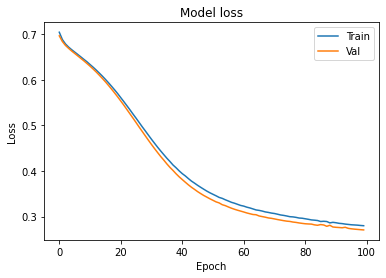

In [43]:
#Here,I have visualize the training loss and validation loss.
plt.plot(history.history['loss'])
plt.plot(history .history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [44]:
#Here, I have ploted traing accuracy and validation accuracy

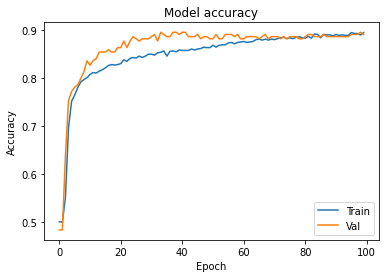

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Since the improvements in model to the training set looks somewhat matched up with improvements to the validation set, it doesn’t seem like overfitting is a huge problem in model. I have used matplotlib to visualize the training and validation loss / accuracy over time to see if there’s overfitting in our model

Adding Regularization

Here, I’ve made a much larger model and I’ve used the Adam optimizer. Adam is one of the most common optimizers WE use, which adds some tweaks to stochastic gradient descent such that it reaches the lower loss function faster.

In [ ]:
ann2 = Sequential([
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

ann2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
history_2 = ann2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 43ms/step - loss: 0.4743 - accuracy: 0.7701 - val_loss: 0.3709 - val_accuracy: 0.8584
Epoch 2/100
32/32 [==============================] - 1s 40ms/step - loss: 0.3413 - accuracy: 0.8630 - val_loss: 0.4261 - val_accuracy: 0.8037
Epoch 3/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3172 - accuracy: 0.8748 - val_loss: 0.3226 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2869 - accuracy: 0.8845 - val_loss: 0.3334 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2685 - accuracy: 0.8924 - val_loss: 0.3141 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2550 - accuracy: 0.8933 - val_loss: 0.3155 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2506 - accuracy: 0.9041 - val_loss: 0.2776 - val_accuracy: 0.9041
Epoch 

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

There are three technic to handle the overfitting.I have used L2 regularization and dropout layer here.The reason i don’t have add early stopping here is because after I’ve used the first two strategies, the validation loss doesn’t take the U-shape I see above and so early stopping will not be as effective

In [ ]:
from keras.layers import Dropout
from keras import regularizers
ann3 = Sequential([Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
Dropout(0.3),Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
Dropout(0.3),
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
Dropout(0.3),
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
Dropout(0.3),
Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])
ann3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist_3 = ann3.fit(X_train, Y_train,batch_size=32, epochs=100,validation_data=(X_val, Y_val))

In [ ]:
#So,I have ploted the loss graphs. I have notice that the loss is a lot higher at the start, and that’s because i’ve changed my loss function.
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [ ]:
#I can see that the validation loss much more closely matches our training loss.
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()